In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs

In [3]:
import logging
from typing import Dict, IO, Iterator, Sequence, Union
from pyteomics import mgf
import pyteomics
from spectrum_utils.spectrum import MsmsSpectrum
import matplotlib.pyplot as plt
import spectrum_utils.plot as sup
import spectrum_utils as su
import numpy as np
from src.load_data import LoadData
from spectrum_utils import plot
from src.preprocessor import Preprocessor
from src.ml_model import MlModel
from src.tanimoto import Tanimoto
from sklearn.model_selection import train_test_split

In [4]:
mgf_path = r"C:\Users\ramir\Downloads\ALL_GNPS_NO_PROPOGATED.mgf"

In [5]:
all_spectrums = LoadData.get_all_spectrums(mgf_path,10)

In [21]:
smiles_1 = all_spectrums[9].smiles
smiles_1

'C[C@H]1C(=O)N[C@H](C(=O)N[C@H](C(=O)N([C@H](C(=O)N[C@H](C(=O)N[C@H](C(=O)N([C@H](C(=O)N1)C[C@@H](C)CO)C)[C@@H](C2=CN(C3=CC=CC=C32)C(C)(C)[C@@H]4CO4)O)[C@H](C)C=C(C)C)CC(C)C)C)C(C)C)[C@@H](C5=CC=CC=C5)OC'

In [22]:
smiles_2 = all_spectrums[6].smiles
smiles_2

'C[C@H]1[C@@H](OC(=O)C2=CSC(=N2)[C@H](C(OC(=O)C3=CSC(=N3)[C@@H](OC1=O)C(C)(C)O)(C)C)OC(=O)C)CCCC(C)(Cl)Cl'

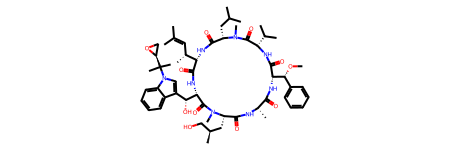

In [23]:
# Convert SMILES notations to RDKit molecules
mol_1 = Chem.MolFromSmiles(smiles_1)
mol_1



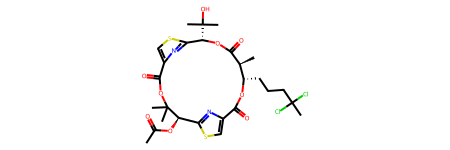

In [24]:
mol_2 = Chem.MolFromSmiles(smiles_2)
mol_2

In [25]:
if mol_1 is not None and mol_2 is not None:
    # Generate Morgan fingerprints for the molecules
    fp1 = AllChem.GetMorganFingerprintAsBitVect(mol_1, 2, nBits=2048)
    fp2 = AllChem.GetMorganFingerprintAsBitVect(mol_2, 2, nBits=2048)

    # Calculate the Tanimoto similarity
    similarity = DataStructs.TanimotoSimilarity(fp1, fp2)
    
    print(f"Tanimoto Similarity: {similarity}")
else:
    print("Unable to generate molecular fingerprints from SMILES notations.")

Tanimoto Similarity: 0.11888111888111888
